In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
from FMTSClust import *


df_std = pd.read_csv('CEA_FAWN_4_AggStd_T_RH_RF_SR_Doy.csv')
df_std.dtypes

StationID          int64
doy                int64
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
dtype: object

In [3]:
df_std.head()

StationID  doy  Temperature  RelatHumidity  Rainfall  SolarRad
0        110    1    -1.203898       1.501730  3.065413 -1.709293
1        110    2    -1.489656       1.136262  1.039038 -1.708913
2        110    3    -1.898296       0.657389  0.719084 -1.401799
3        110    4    -2.031141       0.314839  0.505781 -1.028853
4        110    5    -1.928181       0.666767  0.339879 -1.038716

In [4]:
df_std.shape

(6148, 6)

In [5]:
allColumns=['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad']
df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_std,allColumns,151,305)
df_array_std.shape

(29, 212, 4)

In [6]:
type(df_array_std)


numpy.ndarray

In [7]:
df_array_std

array([[[-0.44286429,  0.48517977, -0.02747556, -0.37110588],
        [-0.46161946, -0.32041691, -0.40668024, -0.20400288],
        [-0.55533087, -0.10524181, -0.79773507, -0.21429432],
        ...,
        [ 1.58100608,  0.54968499,  1.80929712,  0.9806572 ],
        [ 1.64426612,  0.0890104 ,  0.97978688,  1.14445423],
        [ 1.69208148,  0.37725988,  2.40180444,  1.00682275]],

       [[-0.28251794, -0.00569945, -0.26447849, -0.36478127],
        [-0.36585991, -0.34355543, -0.32372922, -0.39060797],
        [-0.41403595, -0.77960042, -1.33099166, -0.10903471],
        ...,
        [ 1.95310804, -0.93453392,  1.01533732,  1.41824245],
        [ 1.91116654, -1.15296062, -0.32372922,  1.51679255],
        [ 1.90083574, -0.72544885,  0.80203468,  1.32942918]],

       [[-0.25308418,  0.26680097,  0.2687781 , -0.29534679],
        [-0.40217228,  0.28125656, -0.79773507, -0.48233438],
        [-0.38789981, -0.23232404, -0.61998288, -0.14980504],
        ...,
        [ 1.71593764,  0.12

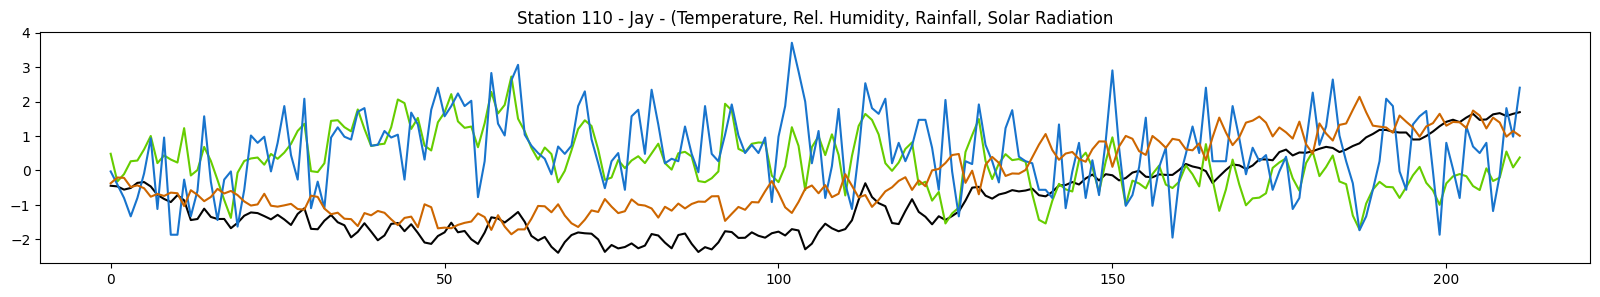

In [8]:
stations_list = df_std['StationID'].unique()
plot_first_TS(df_array_std,stations_list)

In [9]:
unique_station_ids = df_std['StationID'].unique()

stations = pd.read_csv('FAWNStationsListDeg.csv')
names = stations[['StationName','StationID']]
names_sort = names.sort_values(by=['StationID'])
names_sort.head()

StationName  StationID
19               Jay        110
11  Defuniak Springs        120
27              Mayo        121
26          Marianna        130
38            Quincy        140

In [10]:
flattened_df_std = flatten_multivariate_time_series(df_array_std)
flattened_df_std.head()

station0_feature0  station0_feature1  station0_feature2  station0_feature3  \
0          -0.442864           0.485180          -0.027476          -0.371106   
1          -0.461619          -0.320417          -0.406680          -0.204003   
2          -0.555331          -0.105242          -0.797735          -0.214294   
3          -0.507361           0.268011          -1.330992          -0.480219   
4          -0.359239           0.288215          -0.797735          -0.431211   

   station1_feature0  station1_feature1  station1_feature2  station1_feature3  \
0          -0.282518          -0.005699          -0.264478          -0.364781   
1          -0.365860          -0.343555          -0.323729          -0.390608   
2          -0.414036          -0.779600          -1.330992          -0.109035   
3          -0.340419          -0.271661          -0.667383          -0.497505   
4          -0.316808          -0.394575          -1.093989          -0.505605   

   station2_feature0  station2_feature1  ...  station26_feature2  \
0          -0.253084           0.266801  ...            0.659833   
1          -0.402172           0.281257  ...           -0.667383   
2          -0.387900          -0.232324  ...           -0.560732   
3          -0.358595           0.700924  ...           -0.264478   
4          -0.332394           0.317485  ...           -0.667383   

   station26_feature3  station27_feature0  station27_feature1  \
0           -0.056917            1.142939            1.242463   
1            0.055585            1.078842            1.037750   
2            0.049812            0.951381            0.837467   
3           -0.311975            0.970072            1.138915   
4           -0.335089            0.884514            1.309232   

   station27_feature2  station27_feature3  station28_feature0  \
0            0.873136           -0.209050            1.167079   
1           -0.371130           -0.298752            1.025861   
2           -0.691084           -0.299703            0.924498   
3           -0.264478           -0.586698            1.002700   
4            0.102876           -0.500074            0.886421   

   station28_feature1  station28_feature2  station28_feature3  
0            0.752722           -1.117689           -0.355911  
1            0.718517            0.849435           -0.441655  
2            0.146545           -1.330992           -0.247952  
3            0.540188           -1.117689           -0.599843  
4            0.681330            0.162127           -0.569137  

[5 rows x 116 columns]

In [11]:
flattened_df_std.shape

(212, 116)

Clusters = 2  Silhouette Score: 0.221
Clusters = 3  Silhouette Score: 0.183
Clusters = 4  Silhouette Score: 0.188
Clusters = 5  Silhouette Score: 0.167
Clusters = 6  Silhouette Score: 0.146
Clusters = 7  Silhouette Score: 0.144
Clusters = 8  Silhouette Score: 0.128
Clusters = 9  Silhouette Score: 0.152
Clusters = 10  Silhouette Score: 0.117


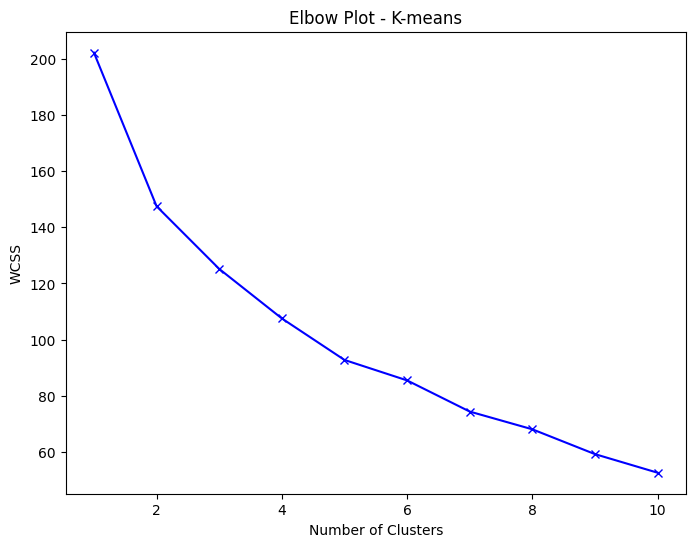

In [43]:
# K-MEANS

# Silhouette Score and Elbow Plot
sil_and_elbow_scores_TSKMeans(df_array_std,11,"dtw",10,150)

In [46]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,2,"dtw",10,50)
y_pred_Kmeans_std

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

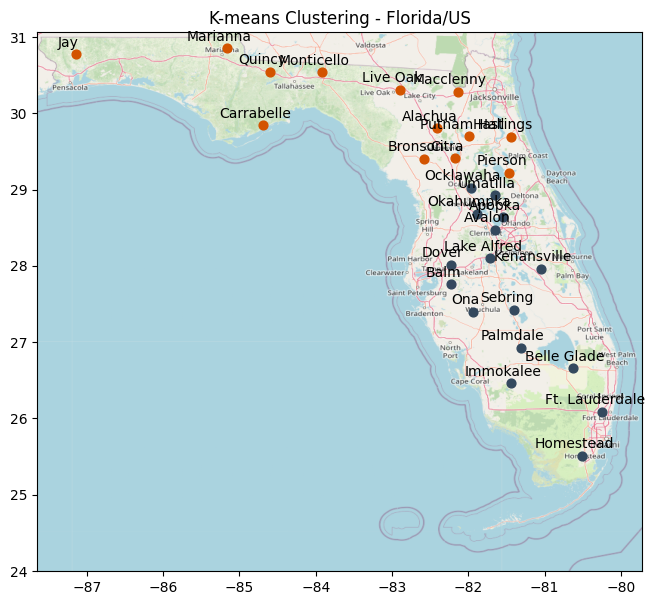

In [47]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Florida/US")

In [35]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.4830394145191497
RMSE for station 1: 0.35259612470497137
RMSE for station 2: 0.28448058375945806
RMSE for station 3: 0.4093002852070805
RMSE for station 4: 0.355309146243103
RMSE for station 5: 0.3161886746296748
RMSE for station 6: 0.33985876774390233
RMSE for station 7: 0.32194211457287
RMSE for station 8: 0.2740314658247366
RMSE for station 9: 0.3248629111860842
RMSE for station 10: 0.31032425299109934
RMSE for station 11: 0.33586230501322345
RMSE for station 12: 0.3933630976043854
RMSE for Cluster 0: 0.346243011076903
Cluster 1
RMSE for station 0: 0.3284571933637548
RMSE for station 1: 0.3466887121757076
RMSE for station 2: 0.3582278119449044
RMSE for station 3: 0.3102558835674096
RMSE for station 4: 0.36055814141598924
RMSE for station 5: 0.24936131157803423
RMSE for station 6: 0.41456387049284593
RMSE for station 7: 0.3807714154261542
RMSE for station 8: 0.38667013677523326
RMSE for station 9: 0.41655166921791614
RMSE for station 10: 0.472938184805

In [61]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,3,"dtw",10,100)
y_pred_Kmeans_std

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 0])

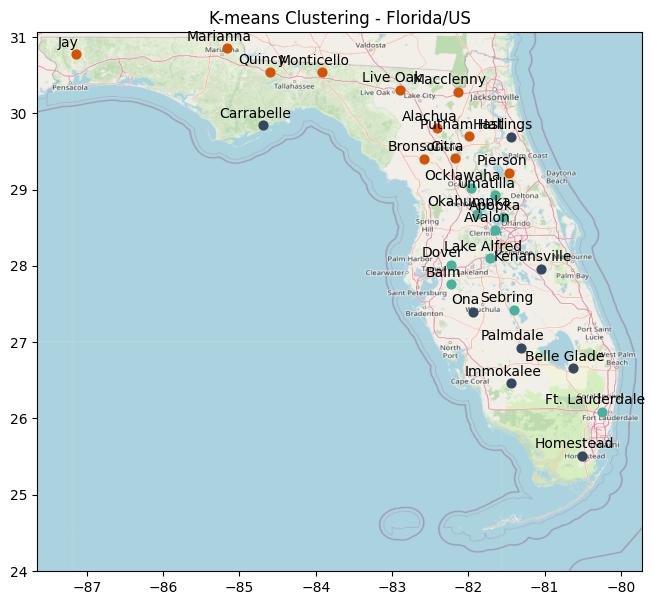

In [62]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Florida/US")

In [63]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.3243201557130218
RMSE for station 1: 0.29316101375298625
RMSE for station 2: 0.34600864174136703
RMSE for station 3: 0.2863853148126703
RMSE for station 4: 0.30223564376934026
RMSE for station 5: 0.25001181552941315
RMSE for station 6: 0.37166240103446796
RMSE for station 7: 0.3600137494701232
RMSE for station 8: 0.48096758401374956
RMSE for station 9: 0.3803756559251003
RMSE for Cluster 0: 0.339514197576224
Cluster 1
RMSE for station 0: 0.4679311088579493
RMSE for station 1: 0.32824173581906396
RMSE for station 2: 0.27103176522431743
RMSE for station 3: 0.34825578329599777
RMSE for station 4: 0.32836240974099795
RMSE for station 5: 0.35072840606412875
RMSE for station 6: 0.3072063095086945
RMSE for station 7: 0.2509309053659368
RMSE for station 8: 0.31713981563071963
RMSE for station 9: 0.2955981093487814
RMSE for station 10: 0.38271621383938265
RMSE for Cluster 1: 0.33164932388145185
Cluster 2
RMSE for station 0: 0.49408272601594083
RMSE for station 1:

In [34]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,4,"dtw",10,50)
y_pred_Kmeans_std

array([0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 1, 2])

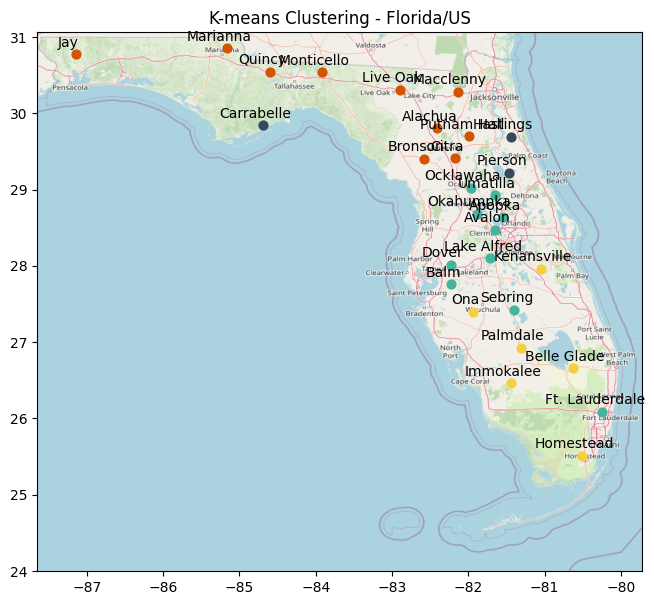

In [35]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Florida/US")

In [36]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.45418681448390436
RMSE for station 1: 0.3303458786704735
RMSE for station 2: 0.27542655820001977
RMSE for station 3: 0.3514960585792287
RMSE for station 4: 0.3285241532007428
RMSE for station 5: 0.35216611969285083
RMSE for station 6: 0.30887938887474087
RMSE for station 7: 0.2578971950176722
RMSE for station 8: 0.2920969883602033
RMSE for station 9: 0.28546042361748686
RMSE for Cluster 0: 0.32364795786973233
Cluster 1
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 1: 0.4032913329391137
Cluster 2
RMSE for station 0: 0.3243201557130218
RMSE for station 1: 0.29316101375298625
RMSE for station 2: 0.34600864174136703
RMSE for station 3: 0.2863853148126703
RMSE for station 4: 0.30223564376934026
RMSE for station 5: 0.25001181552941315
RMSE for station 6: 0.

In [14]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,5,"dtw",10,50)
y_pred_Kmeans_std

array([2, 2, 2, 4, 2, 2, 2, 1, 1, 1, 2, 4, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1,
       3, 3, 0, 3, 3, 3, 1])

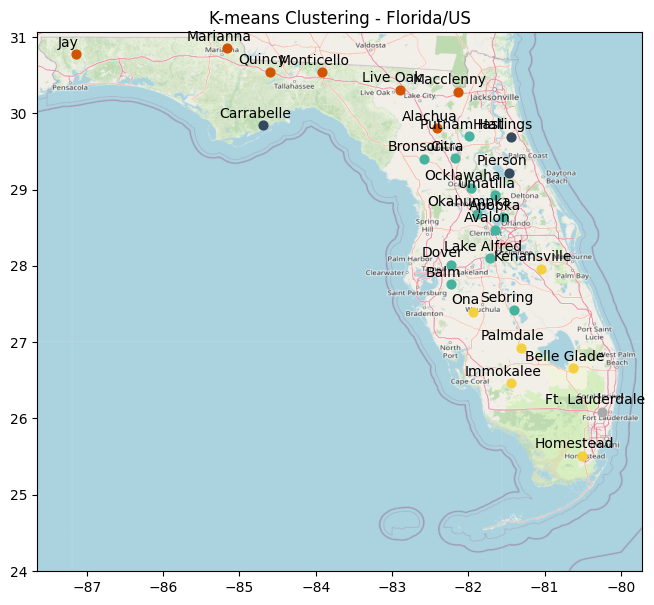

In [15]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Florida/US")

In [16]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for Cluster 0: 0.0
Cluster 1
RMSE for station 0: 0.3618593720694931
RMSE for station 1: 0.3315665024552807
RMSE for station 2: 0.33919629165933685
RMSE for station 3: 0.3268938747950743
RMSE for station 4: 0.32345835974866155
RMSE for station 5: 0.3532621270724083
RMSE for station 6: 0.27783322271116456
RMSE for station 7: 0.31938560542757605
RMSE for station 8: 0.2738828881032011
RMSE for station 9: 0.3830116546772974
RMSE for station 10: 0.3815220521649598
RMSE for station 11: 0.41517616438658017
RMSE for Cluster 1: 0.3405873429392528
Cluster 2
RMSE for station 0: 0.47188229327971876
RMSE for station 1: 0.31916923477453635
RMSE for station 2: 0.2554572165096936
RMSE for station 3: 0.3453530665476319
RMSE for station 4: 0.31326059729608324
RMSE for station 5: 0.34634484060255905
RMSE for station 6: 0.34940109359673355
RMSE for Cluster 2: 0.34298119180099373
Cluster 3
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.39

In [14]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,6,"dtw",10,50)
y_pred_Kmeans_std

array([4, 4, 4, 3, 4, 0, 0, 0, 0, 0, 0, 3, 5, 0, 5, 5, 1, 5, 1, 2, 5, 5,
       2, 2, 1, 2, 2, 2, 1])

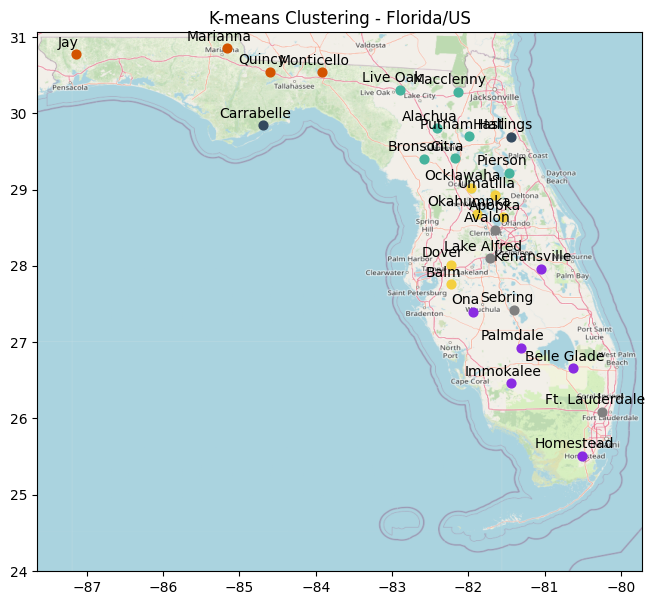

In [15]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Florida/US")

In [16]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.3370264727904576
RMSE for station 1: 0.352959098510685
RMSE for station 2: 0.309550818997948
RMSE for station 3: 0.24985660812239083
RMSE for station 4: 0.29468355573284954
RMSE for station 5: 0.2957090254598612
RMSE for station 6: 0.33166789027672033
RMSE for Cluster 0: 0.31020763855584466
Cluster 1
RMSE for station 0: 0.3016558752632285
RMSE for station 1: 0.2142151195819682
RMSE for station 2: 0.559388383896901
RMSE for station 3: 0.3635310816301303
RMSE for Cluster 1: 0.359697615093057
Cluster 2
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 2: 0.4032913329391137
Cluster 3
RMSE for station 0: 0.54851512348614
RMSE for station 1: 0.4572495739547722
RMSE for Cluster 3: 0.5028823487204561
Cluster 4
RMSE for station 0: 0.4646491171527515
RMSE for stati

In [17]:
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,7,"dtw",10,50)
y_pred_Kmeans_std

array([5, 5, 5, 2, 5, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 6, 6, 6, 3, 0, 0,
       3, 4, 6, 4, 3, 3, 6])

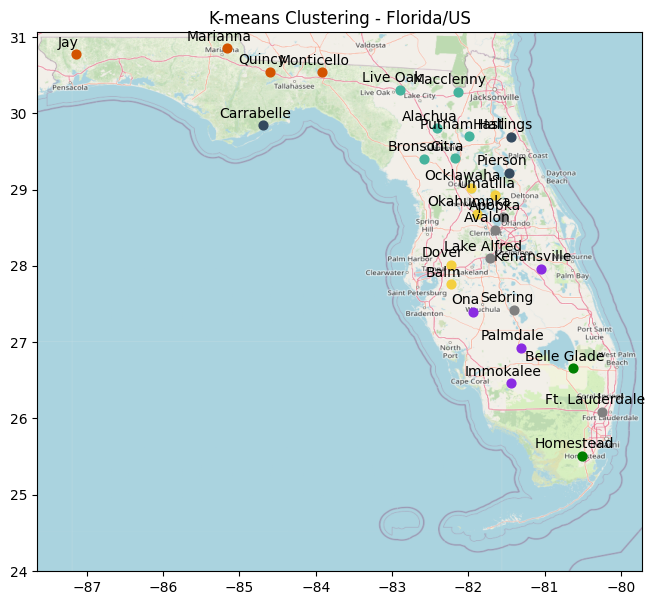

In [18]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Florida/US")

In [19]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.3174069678428333
RMSE for station 1: 0.2903920035622447
RMSE for station 2: 0.33460498425977686
RMSE for station 3: 0.3518882108911466
RMSE for station 4: 0.3451322341197334
RMSE for Cluster 0: 0.32788488013514694
Cluster 1
RMSE for station 0: 0.3337553275223485
RMSE for station 1: 0.35786984921050513
RMSE for station 2: 0.30300171805901216
RMSE for station 3: 0.26843300897894784
RMSE for station 4: 0.28557619179009786
RMSE for station 5: 0.2832547845357559
RMSE for Cluster 1: 0.30531514668277787
Cluster 2
RMSE for station 0: 0.539148202249284
RMSE for station 1: 0.3624328407062014
RMSE for station 2: 0.34633470576505465
RMSE for Cluster 2: 0.41597191624018004
Cluster 3
RMSE for station 0: 0.45506463567467803
RMSE for station 1: 0.42212983148233946
RMSE for station 2: 0.39432909096485386
RMSE for station 3: 0.3331368222062808
RMSE for Cluster 3: 0.401165095082038
Cluster 4
RMSE for station 0: 0.4883514464704368
RMSE for station 1: 0.4896176868775867
RMSE

Clusters = 2  Silhouette Score: 0.247
Clusters = 3  Silhouette Score: 0.153
Clusters = 4  Silhouette Score: 0.072
Clusters = 5  Silhouette Score: 0.039
Clusters = 6  Silhouette Score: 0.056
Clusters = 7  Silhouette Score: 0.049
Clusters = 8  Silhouette Score: 0.027
Clusters = 9  Silhouette Score: 0.026
Clusters = 10  Silhouette Score: -0.043


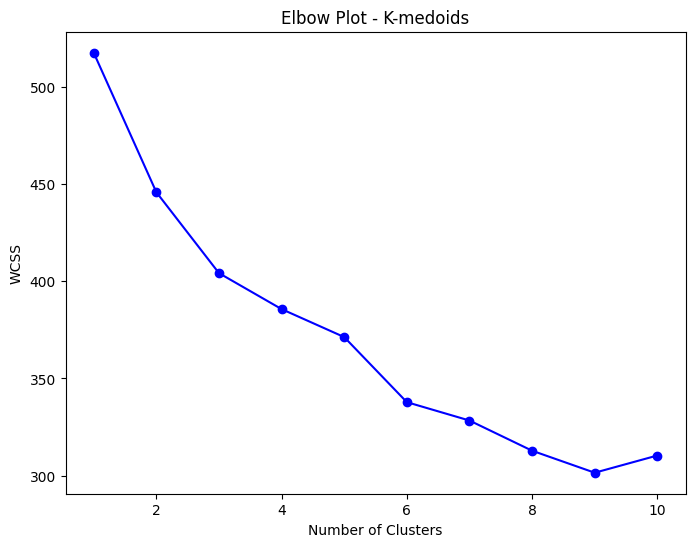

In [11]:
# K-MEDOIDS
sil_and_elbow_scores_TSKMedoids(df_array_std, 11, 300)

In [12]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 2, 300)
y_pred_Kmedoids_std

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

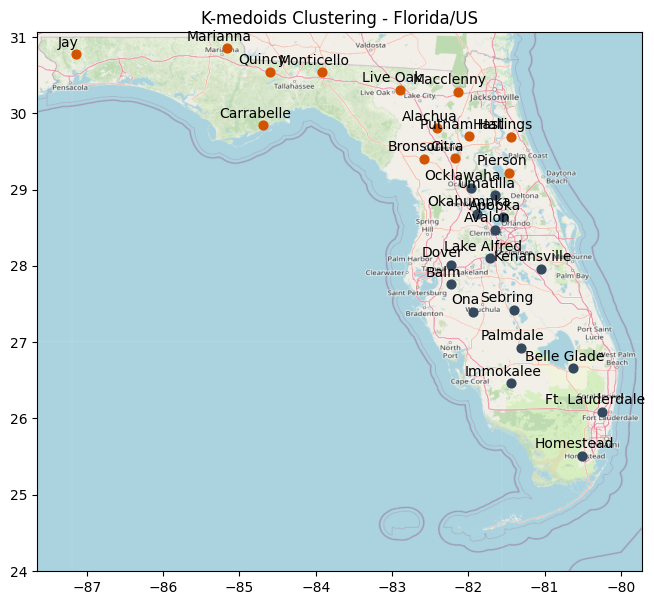

In [13]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

In [14]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.3284571933637548
RMSE for station 1: 0.3466887121757076
RMSE for station 2: 0.3582278119449044
RMSE for station 3: 0.3102558835674096
RMSE for station 4: 0.36055814141598924
RMSE for station 5: 0.24936131157803423
RMSE for station 6: 0.41456387049284593
RMSE for station 7: 0.3807714154261542
RMSE for station 8: 0.38667013677523326
RMSE for station 9: 0.41655166921791614
RMSE for station 10: 0.47293818480514843
RMSE for station 11: 0.4805124252984859
RMSE for station 12: 0.484745378869748
RMSE for station 13: 0.46620019857047246
RMSE for station 14: 0.37092921215802427
RMSE for station 15: 0.3148494477650037
RMSE for Cluster 0: 0.38389256208905204
Cluster 1
RMSE for station 0: 0.4830394145191497
RMSE for station 1: 0.35259612470497137
RMSE for station 2: 0.28448058375945806
RMSE for station 3: 0.4093002852070805
RMSE for station 4: 0.355309146243103
RMSE for station 5: 0.3161886746296748
RMSE for station 6: 0.33985876774390233
RMSE for station 7: 0.321942

In [15]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 3, 300)
y_pred_Kmedoids_std

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2])

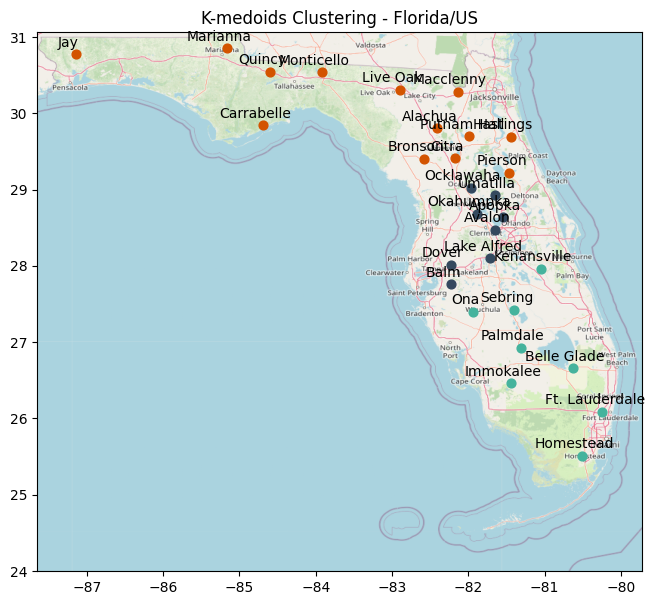

In [16]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

In [17]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.32308523107825954
RMSE for station 1: 0.28790056879332643
RMSE for station 2: 0.30945868149092204
RMSE for station 3: 0.2528314663344296
RMSE for station 4: 0.2930851819502336
RMSE for station 5: 0.25010350197805287
RMSE for station 6: 0.37066673530981303
RMSE for station 7: 0.37395617900060246
RMSE for Cluster 0: 0.307635943241955
Cluster 1
RMSE for station 0: 0.4830394145191497
RMSE for station 1: 0.35259612470497137
RMSE for station 2: 0.28448058375945806
RMSE for station 3: 0.4093002852070805
RMSE for station 4: 0.355309146243103
RMSE for station 5: 0.3161886746296748
RMSE for station 6: 0.33985876774390233
RMSE for station 7: 0.32194211457287
RMSE for station 8: 0.2740314658247366
RMSE for station 9: 0.3248629111860842
RMSE for station 10: 0.31032425299109934
RMSE for station 11: 0.33586230501322345
RMSE for station 12: 0.3933630976043854
RMSE for Cluster 1: 0.346243011076903
Cluster 2
RMSE for station 0: 0.408822979654766
RMSE for station 1: 0.3862

In [18]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 4, 300)
y_pred_Kmedoids_std

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 2])

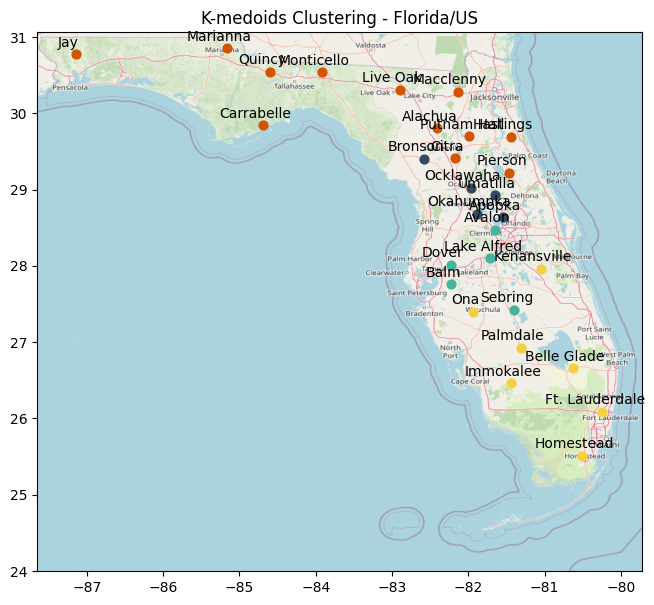

In [19]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

In [20]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.40485003525838364
RMSE for station 1: 0.2706070572041545
RMSE for station 2: 0.2750544409463364
RMSE for station 3: 0.3328241095844674
RMSE for station 4: 0.3032127069775073
RMSE for Cluster 0: 0.3173096699941698
Cluster 1
RMSE for station 0: 0.454217647151863
RMSE for station 1: 0.410792276359845
RMSE for station 2: 0.388866259341347
RMSE for station 3: 0.47636390482023744
RMSE for station 4: 0.4409377126494556
RMSE for station 5: 0.39216248159850464
RMSE for station 6: 0.3338115700295523
RMSE for Cluster 1: 0.4138788359929721
Cluster 2
RMSE for station 0: 0.2950300118579923
RMSE for station 1: 0.24518902186468733
RMSE for station 2: 0.34329754685594494
RMSE for station 3: 0.3559352356223132
RMSE for station 4: 0.3872553948924324
RMSE for Cluster 2: 0.32534144221867406
Cluster 3
RMSE for station 0: 0.4862740577954308
RMSE for station 1: 0.3495157420174393
RMSE for station 2: 0.2729544712087847
RMSE for station 3: 0.41017833361892325
RMSE for station 4: 

In [17]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 5, 300)
y_pred_Kmedoids_std

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 2, 2, 2, 4, 1, 1,
       4, 4, 4, 4, 4, 4, 4])

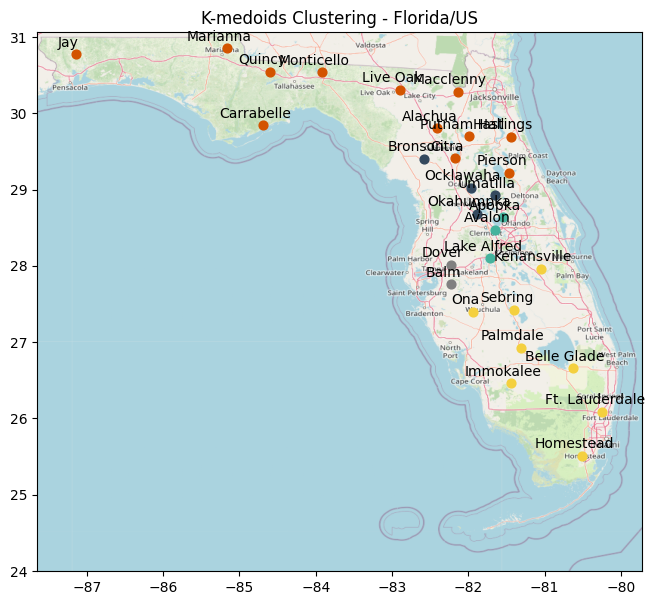

In [18]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

In [19]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.40765429229596784
RMSE for station 1: 0.2872509798263103
RMSE for station 2: 0.28837347754142084
RMSE for station 3: 0.34117489323042277
RMSE for Cluster 0: 0.33111341072353045
Cluster 1
RMSE for station 0: 0.3456195873733139
RMSE for station 1: 0.37571659197789103
RMSE for Cluster 1: 0.3606680896756025
Cluster 2
RMSE for station 0: 0.25681189102432533
RMSE for station 1: 0.3012456295287593
RMSE for station 2: 0.2569955110444531
RMSE for Cluster 2: 0.2716843438658459
Cluster 3
RMSE for station 0: 0.4862740577954308
RMSE for station 1: 0.3495157420174393
RMSE for station 2: 0.2729544712087847
RMSE for station 3: 0.41017833361892325
RMSE for station 4: 0.3532624465874917
RMSE for station 5: 0.3201456196437826
RMSE for station 6: 0.3440484392935652
RMSE for station 7: 0.26872474733457674
RMSE for station 8: 0.3404556533053532
RMSE for station 9: 0.34705034630615345
RMSE for station 10: 0.3235874817337508
RMSE for station 11: 0.40408997518383555
RMSE for Clu

In [12]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 6, 300)
y_pred_Kmedoids_std

array([5, 5, 5, 3, 5, 3, 3, 0, 3, 3, 3, 3, 0, 3, 0, 0, 2, 2, 2, 4, 1, 1,
       4, 4, 4, 4, 4, 4, 4])

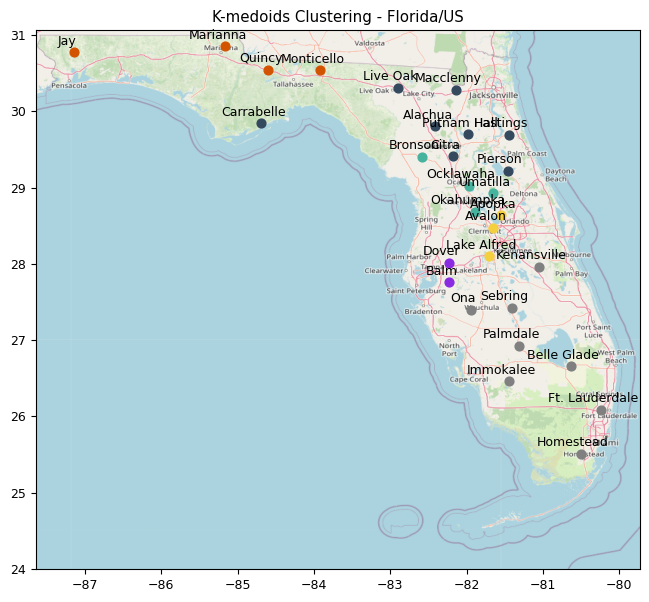

In [13]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

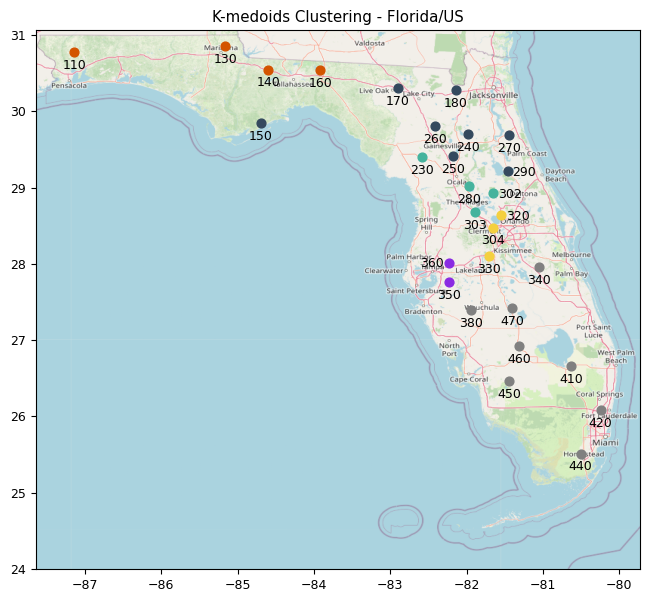

In [14]:
plot_map_clustering_IDs(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

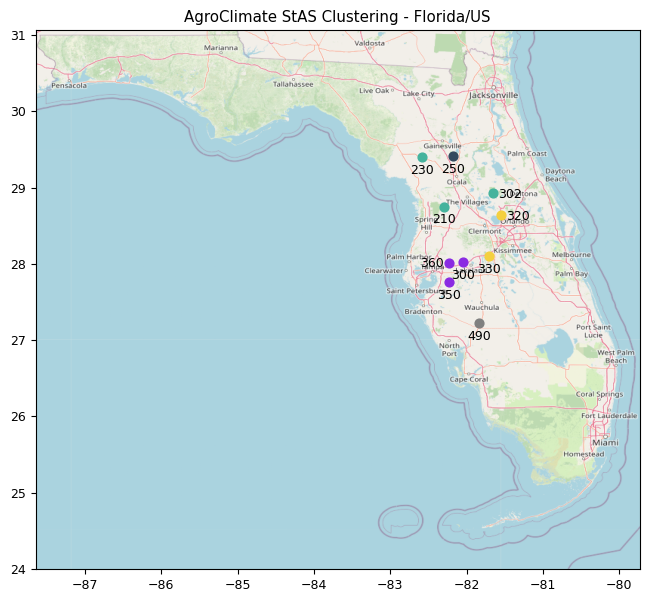

In [2]:
import pandas as pd
from FWTSClust_functions import *

StAS_station_ids = [210,230,250,300,302,320,330,350,360,490]
StAS_clusters =    [2,  2,  1,  4,  2,  3,  3,  4,  4,  5]
allStations = pd.read_csv('FAWNStationsListDeg.csv')

StAS_stations_map = allStations[allStations.StationID.isin(StAS_station_ids) == True]

# StAS PLOT
plot_StAS_map_clustering_IDs(StAS_stations_map,StAS_clusters, "AgroClimate StAS Clustering - Florida/US")

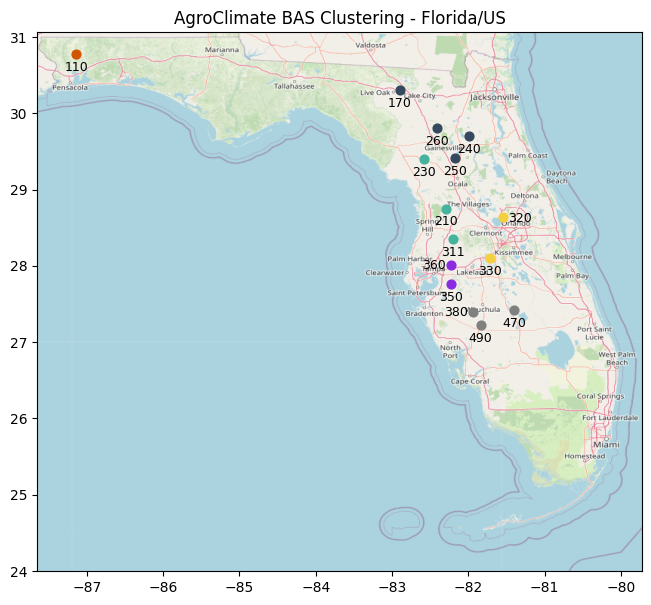

In [1]:
import pandas as pd
from FWTSClust_functions import *

BAS_station_ids = [110,170,210,230,240,250,260,311,320,330,350,360,380,470,490]
BAS_clusters =    [0,1,2,2,1,1,1,2,3,3,4,4,5,5,5]
allStations = pd.read_csv('FAWNStationsListDeg.csv')

BAS_stations_map = allStations[allStations.StationID.isin(BAS_station_ids) == True]

# BAS PLOT
plot_BAS_map_clustering_IDs(BAS_stations_map,BAS_clusters, "AgroClimate BAS Clustering - Florida/US")

In [ ]:
# BAS PLOT
plot_map_clustering_BAS(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

In [25]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.40765429229596784
RMSE for station 1: 0.2872509798263103
RMSE for station 2: 0.28837347754142084
RMSE for station 3: 0.34117489323042277
RMSE for Cluster 0: 0.33111341072353045
Cluster 1
RMSE for station 0: 0.3456195873733139
RMSE for station 1: 0.37571659197789103
RMSE for Cluster 1: 0.3606680896756025
Cluster 2
RMSE for station 0: 0.25681189102432533
RMSE for station 1: 0.3012456295287593
RMSE for station 2: 0.2569955110444531
RMSE for Cluster 2: 0.2716843438658459
Cluster 3
RMSE for station 0: 0.40527686543360864
RMSE for station 1: 0.316747623713974
RMSE for station 2: 0.34408570306409914
RMSE for station 3: 0.2595517741223529
RMSE for station 4: 0.31180694058693786
RMSE for station 5: 0.3002774667494533
RMSE for station 6: 0.3139672308232446
RMSE for station 7: 0.35957987853693407
RMSE for Cluster 3: 0.3264116853788256
Cluster 4
RMSE for station 0: 0.408822979654766
RMSE for station 1: 0.38621637261171476
RMSE for station 2: 0.40190600150604106
RMSE

In [20]:
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, 7, 300)
y_pred_Kmedoids_std

array([1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 3, 3, 0, 0, 0, 6, 6, 6, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 4])

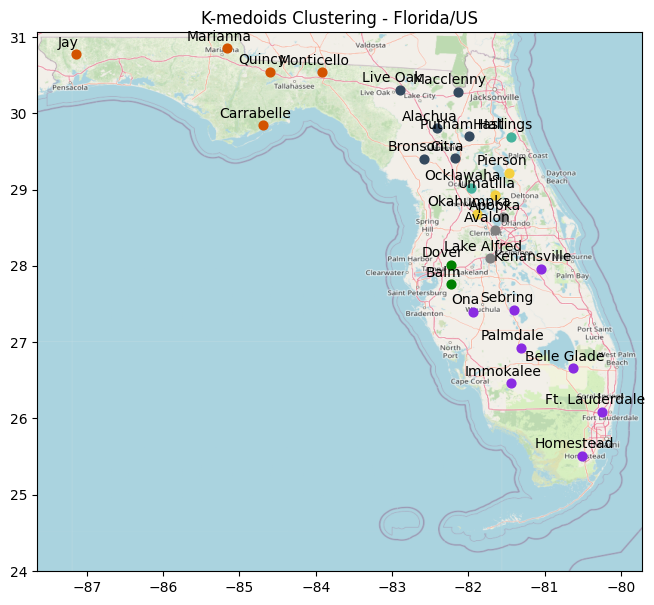

In [21]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-medoids Clustering - Florida/US")

In [22]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.3074345970380549
RMSE for station 1: 0.288422112789152
RMSE for station 2: 0.3417244450019843
RMSE for Cluster 0: 0.31252705160973043
Cluster 1
RMSE for station 0: 0.4871204467193693
RMSE for station 1: 0.3404202554396245
RMSE for station 2: 0.25592715296026897
RMSE for station 3: 0.4445771774793811
RMSE for station 4: 0.35253418119509894
RMSE for Cluster 1: 0.37611584275874854
Cluster 2
RMSE for station 0: 0.3456195873733139
RMSE for station 1: 0.37571659197789103
RMSE for Cluster 2: 0.3606680896756025
Cluster 3
RMSE for station 0: 0.412893982844579
RMSE for station 1: 0.38712179644900574
RMSE for Cluster 3: 0.40000788964679235
Cluster 4
RMSE for station 0: 0.408822979654766
RMSE for station 1: 0.38621637261171476
RMSE for station 2: 0.40190600150604106
RMSE for station 3: 0.486002094856305
RMSE for station 4: 0.44483394700371837
RMSE for station 5: 0.393374042027681
RMSE for station 6: 0.30650991365813934
RMSE for station 7: 0.3358758151253299
RMSE for

In [9]:
# HIERARCHICAL CLUSTERING

list_names_dendogram = []
for index, row in names_sort.iterrows():
    stID = row['StationID']
    if stID in unique_station_ids:
        list_names_dendogram.append(row['StationName'])
        
list_names_dendogram

['Jay',
 'Marianna',
 'Quincy',
 'Carrabelle',
 'Monticello',
 'Live Oak',
 'Macclenny',
 'Bronson',
 'Putnam Hall',
 'Citra',
 'Alachua',
 'Hastings',
 'Ocklawaha',
 'Pierson',
 'Umatilla',
 'Okahumpka',
 'Avalon',
 'Apopka',
 'Lake Alfred',
 'Kenansville',
 'Balm',
 'Dover',
 'Ona',
 'Belle Glade',
 'Ft. Lauderdale',
 'Homestead',
 'Immokalee',
 'Palmdale',
 'Sebring']

In [10]:
type(list_names_dendogram)

list

In [18]:
sil_score_TSHierarcClustering(df_array_std)

Clusters = 2  Silhouette Score: 0.221
Clusters = 3  Silhouette Score: 0.182
Clusters = 4  Silhouette Score: 0.195
Clusters = 5  Silhouette Score: 0.195
Clusters = 6  Silhouette Score: 0.175
Clusters = 7  Silhouette Score: 0.170
Clusters = 8  Silhouette Score: 0.158
Clusters = 9  Silhouette Score: 0.137
Clusters = 10  Silhouette Score: 0.131
Clusters = 11  Silhouette Score: 0.114
Clusters = 12  Silhouette Score: 0.115
Clusters = 13  Silhouette Score: 0.105
Clusters = 14  Silhouette Score: 0.101
Clusters = 15  Silhouette Score: 0.095
Clusters = 16  Silhouette Score: 0.087
Clusters = 17  Silhouette Score: 0.082
Clusters = 18  Silhouette Score: 0.078
Clusters = 19  Silhouette Score: 0.068
Clusters = 20  Silhouette Score: 0.059
Clusters = 21  Silhouette Score: 0.054
Clusters = 22  Silhouette Score: 0.045
Clusters = 23  Silhouette Score: 0.038
Clusters = 24  Silhouette Score: 0.031
Clusters = 25  Silhouette Score: 0.023
Clusters = 26  Silhouette Score: 0.018
Clusters = 27  Silhouette Score: 

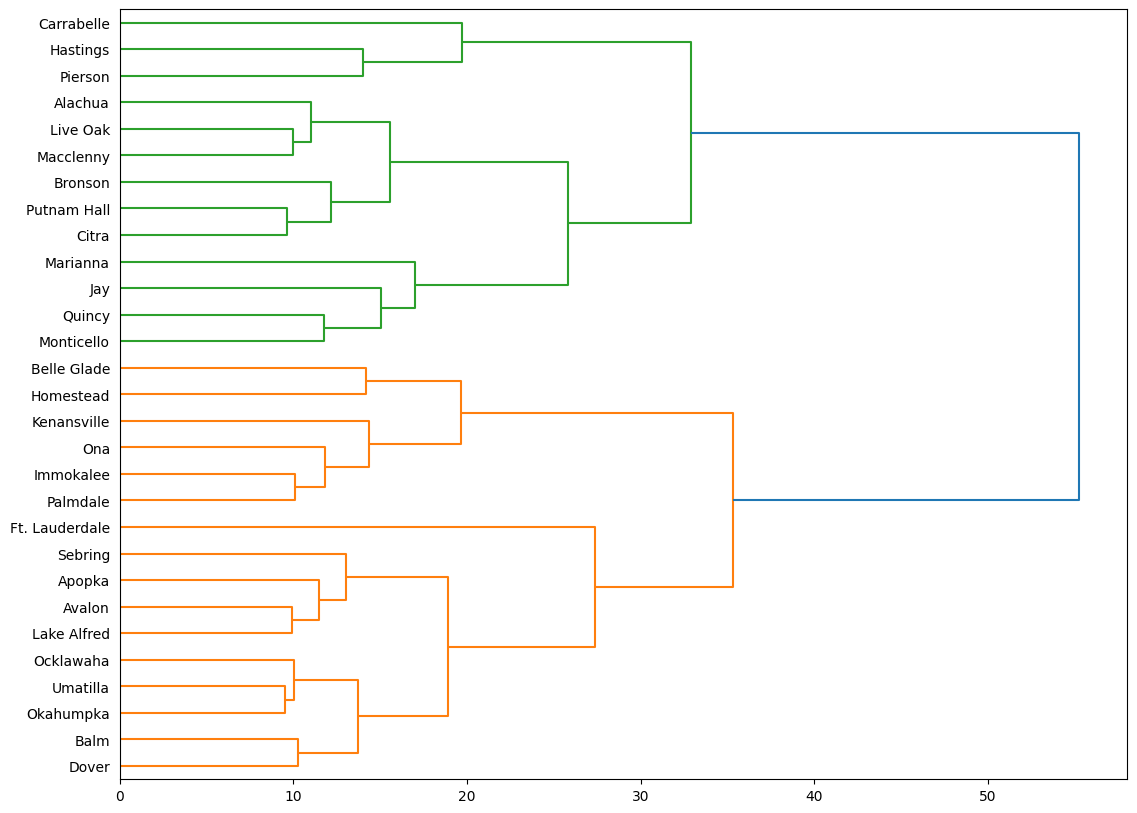

In [19]:
n_clusters=2
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

In [20]:
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
list_index_dendogram_std

array([ 3, 11, 13, 10,  5,  6,  7,  8,  9,  1,  0,  2,  4, 23, 25, 19, 22,
       26, 27, 24, 28, 17, 16, 18, 12, 14, 15, 20, 21], dtype=int32)

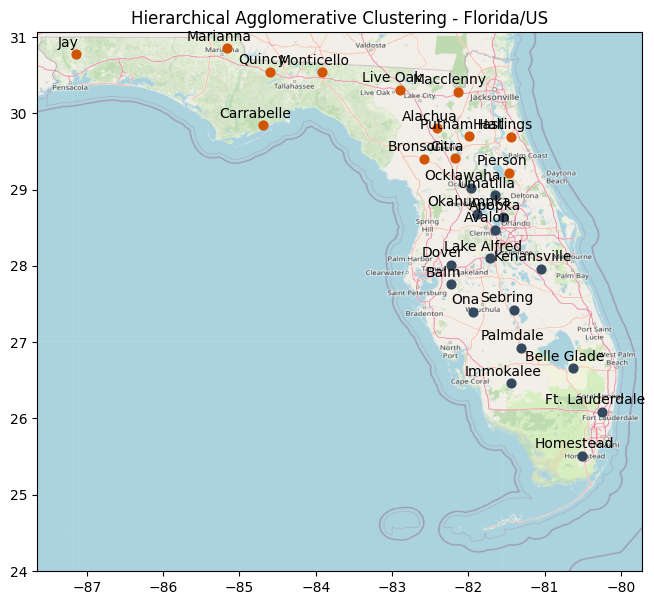

In [21]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std, "Hierarchical Agglomerative Clustering - Florida/US")

In [22]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.4830394145191497
RMSE for station 1: 0.35259612470497137
RMSE for station 2: 0.28448058375945806
RMSE for station 3: 0.4093002852070805
RMSE for station 4: 0.355309146243103
RMSE for station 5: 0.3161886746296748
RMSE for station 6: 0.33985876774390233
RMSE for station 7: 0.32194211457287
RMSE for station 8: 0.2740314658247366
RMSE for station 9: 0.3248629111860842
RMSE for station 10: 0.31032425299109934
RMSE for station 11: 0.33586230501322345
RMSE for station 12: 0.3933630976043854
RMSE for Cluster 1: 0.346243011076903
Cluster 2
RMSE for station 0: 0.3284571933637548
RMSE for station 1: 0.3466887121757076
RMSE for station 2: 0.3582278119449044
RMSE for station 3: 0.3102558835674096
RMSE for station 4: 0.36055814141598924
RMSE for station 5: 0.24936131157803423
RMSE for station 6: 0.41456387049284593
RMSE for station 7: 0.3807714154261542
RMSE for station 8: 0.38667013677523326
RMSE for station 9: 0.41655166921791614
RMSE for station 10: 0.472938184805

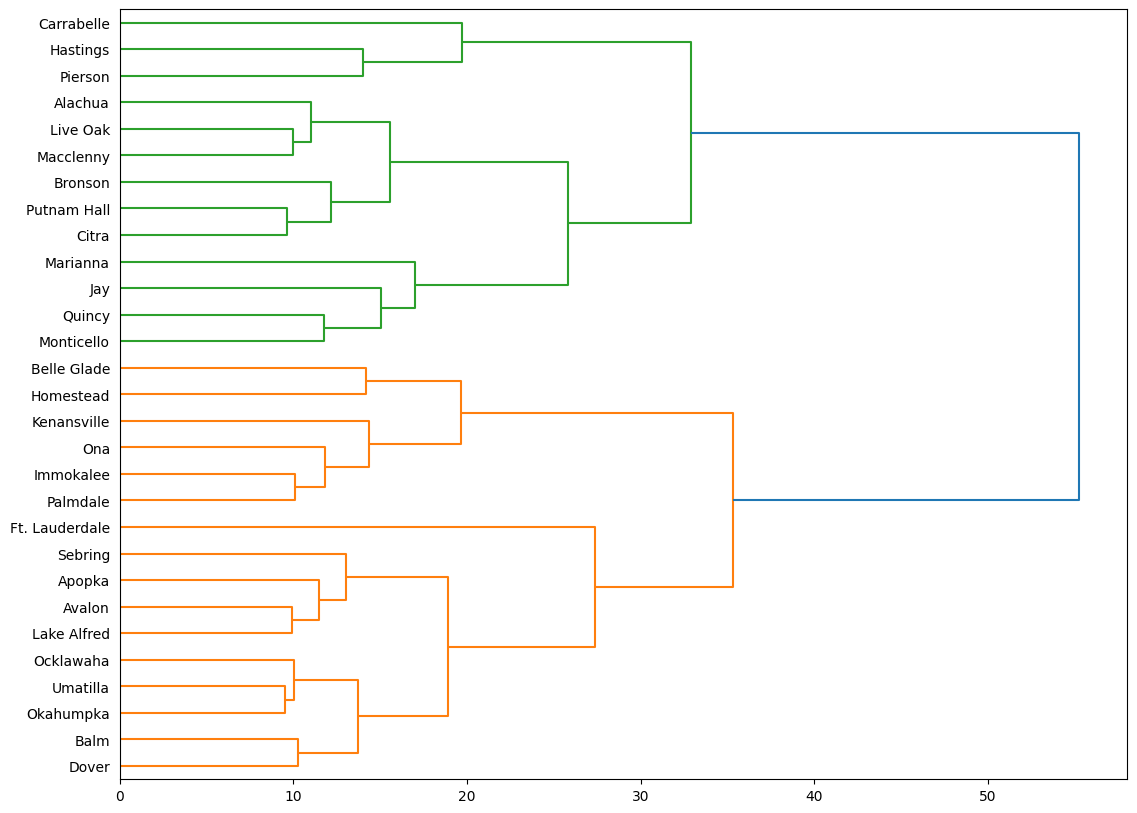

In [23]:
n_clusters=3
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

In [24]:
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
list_index_dendogram_std

array([ 3, 11, 13, 10,  5,  6,  7,  8,  9,  1,  0,  2,  4, 23, 25, 19, 22,
       26, 27, 24, 28, 17, 16, 18, 12, 14, 15, 20, 21], dtype=int32)

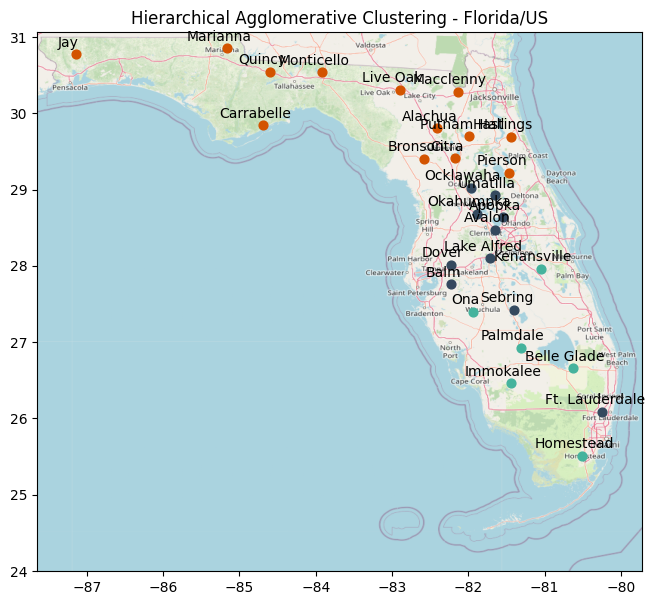

In [25]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std, "Hierarchical Agglomerative Clustering - Florida/US")

In [26]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.4830394145191497
RMSE for station 1: 0.35259612470497137
RMSE for station 2: 0.28448058375945806
RMSE for station 3: 0.4093002852070805
RMSE for station 4: 0.355309146243103
RMSE for station 5: 0.3161886746296748
RMSE for station 6: 0.33985876774390233
RMSE for station 7: 0.32194211457287
RMSE for station 8: 0.2740314658247366
RMSE for station 9: 0.3248629111860842
RMSE for station 10: 0.31032425299109934
RMSE for station 11: 0.33586230501322345
RMSE for station 12: 0.3933630976043854
RMSE for Cluster 1: 0.346243011076903
Cluster 2
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 2: 0.4032913329391137
Cluster 3
RMSE for station 0: 0.3243201557130218
RMSE for station 1: 0.29316101375298625
RMSE for station 2: 0.34600864174136703
RMSE for station 3: 0.2863

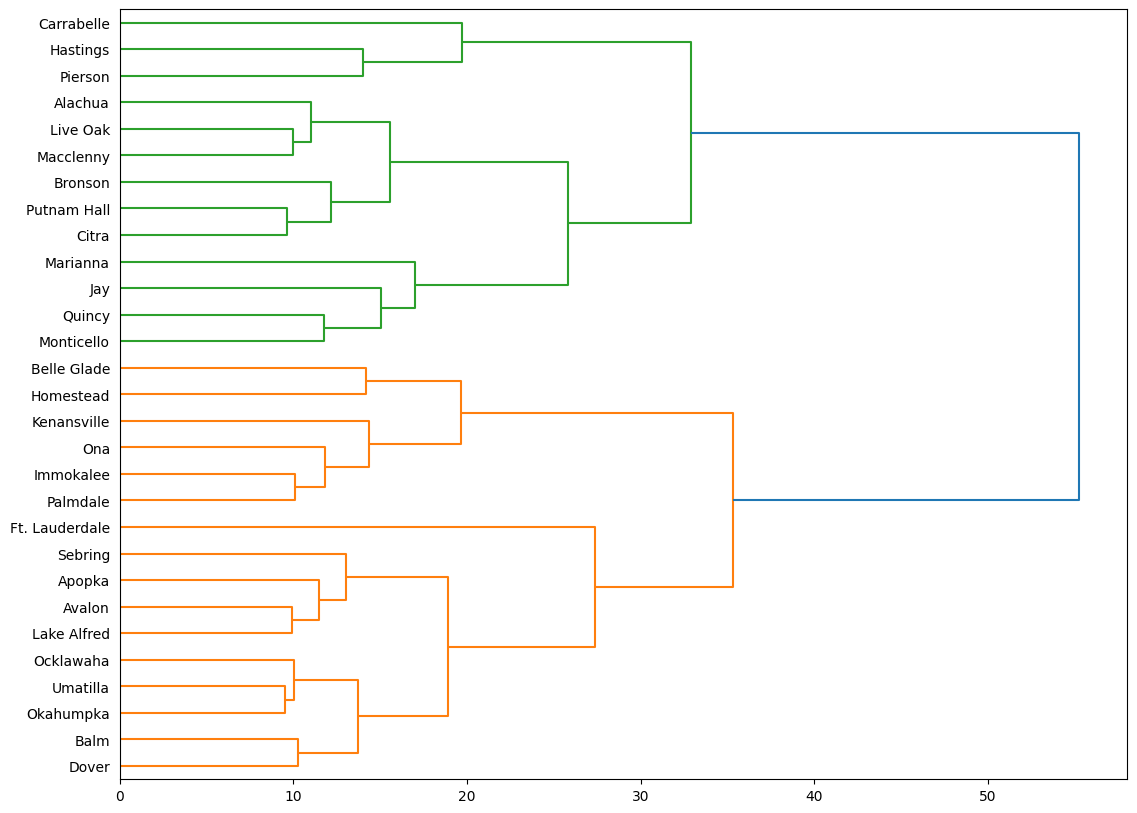

In [27]:
n_clusters=4
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

In [28]:
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
list_index_dendogram_std

array([ 3, 11, 13, 10,  5,  6,  7,  8,  9,  1,  0,  2,  4, 23, 25, 19, 22,
       26, 27, 24, 28, 17, 16, 18, 12, 14, 15, 20, 21], dtype=int32)

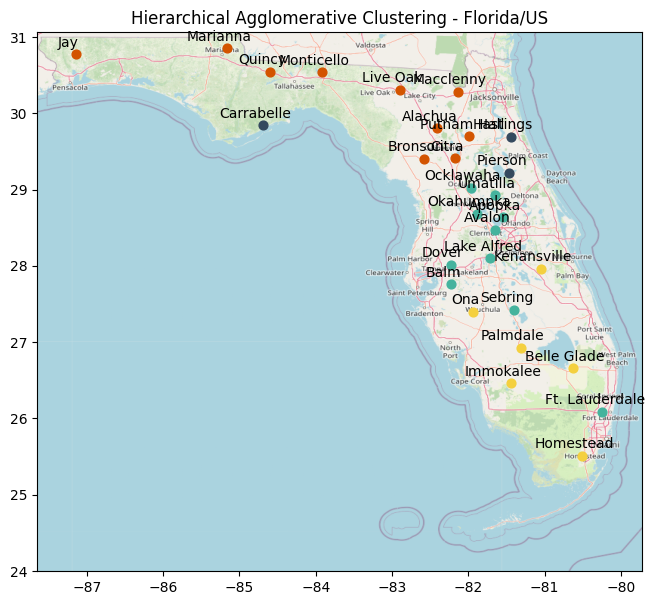

In [29]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std, "Hierarchical Agglomerative Clustering - Florida/US")

In [53]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.539148202249284
RMSE for station 1: 0.3624328407062014
RMSE for station 2: 0.34633470576505465
RMSE for Cluster 1: 0.41597191624018004
Cluster 2
RMSE for station 0: 0.45418681448390436
RMSE for station 1: 0.3303458786704735
RMSE for station 2: 0.27542655820001977
RMSE for station 3: 0.3514960585792287
RMSE for station 4: 0.3285241532007428
RMSE for station 5: 0.35216611969285083
RMSE for station 6: 0.30887938887474087
RMSE for station 7: 0.2578971950176722
RMSE for station 8: 0.2920969883602033
RMSE for station 9: 0.28546042361748686
RMSE for Cluster 2: 0.32364795786973233
Cluster 3
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 3: 0.4032913329391137
Cluster 4
RMSE for station 0: 0.3243201557130218
RMSE for station 1: 0.29316101375298625
RMSE for stati

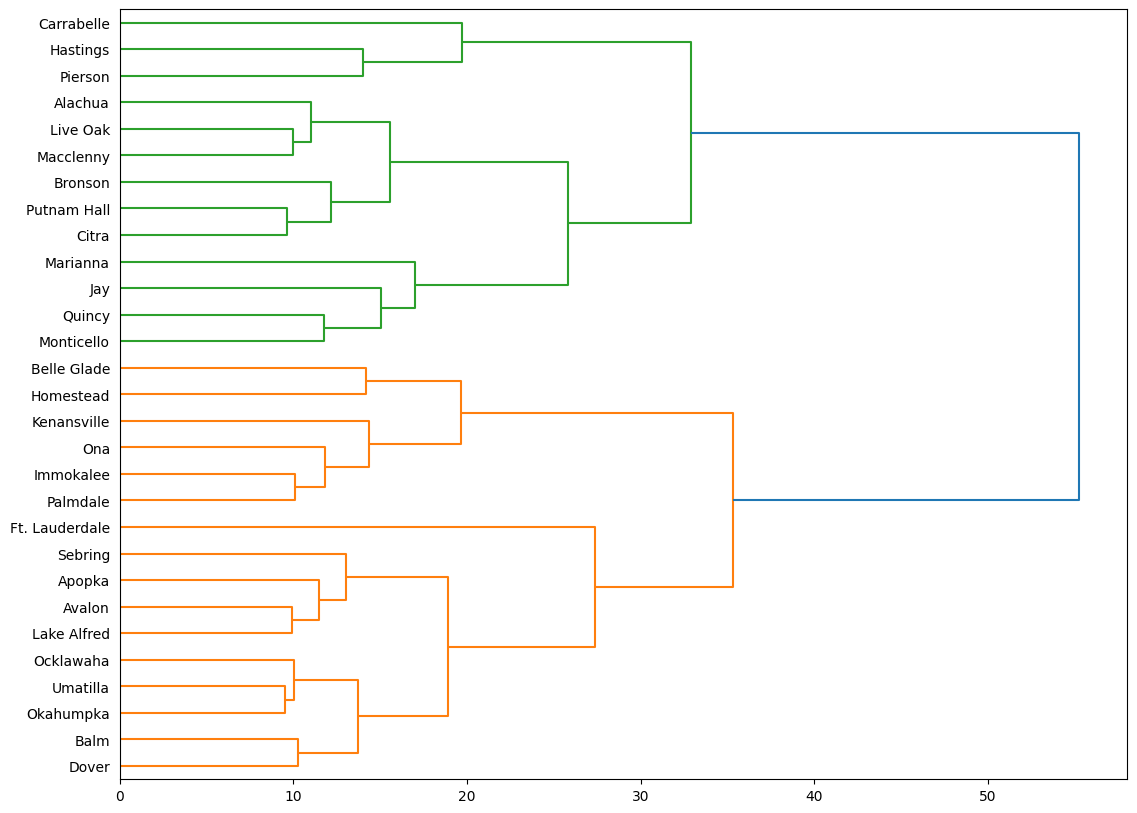

In [71]:
n_clusters=5
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

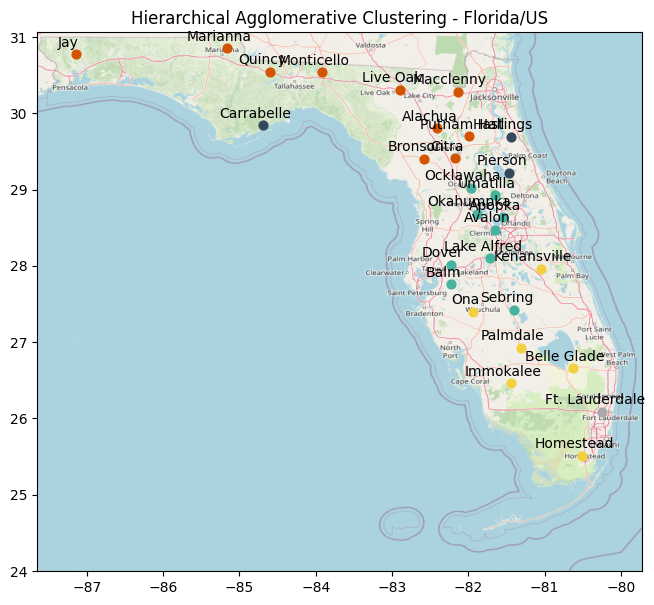

In [72]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std, "Hierarchical Agglomerative Clustering - Florida/US")

In [73]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.539148202249284
RMSE for station 1: 0.3624328407062014
RMSE for station 2: 0.34633470576505465
RMSE for Cluster 1: 0.41597191624018004
Cluster 2
RMSE for station 0: 0.45418681448390436
RMSE for station 1: 0.3303458786704735
RMSE for station 2: 0.27542655820001977
RMSE for station 3: 0.3514960585792287
RMSE for station 4: 0.3285241532007428
RMSE for station 5: 0.35216611969285083
RMSE for station 6: 0.30887938887474087
RMSE for station 7: 0.2578971950176722
RMSE for station 8: 0.2920969883602033
RMSE for station 9: 0.28546042361748686
RMSE for Cluster 2: 0.32364795786973233
Cluster 3
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 3: 0.4032913329391137
Cluster 4
RMSE for station 0: 0.3095534914798923
RMSE for station 1: 0.2908160402921319
RMSE for statio

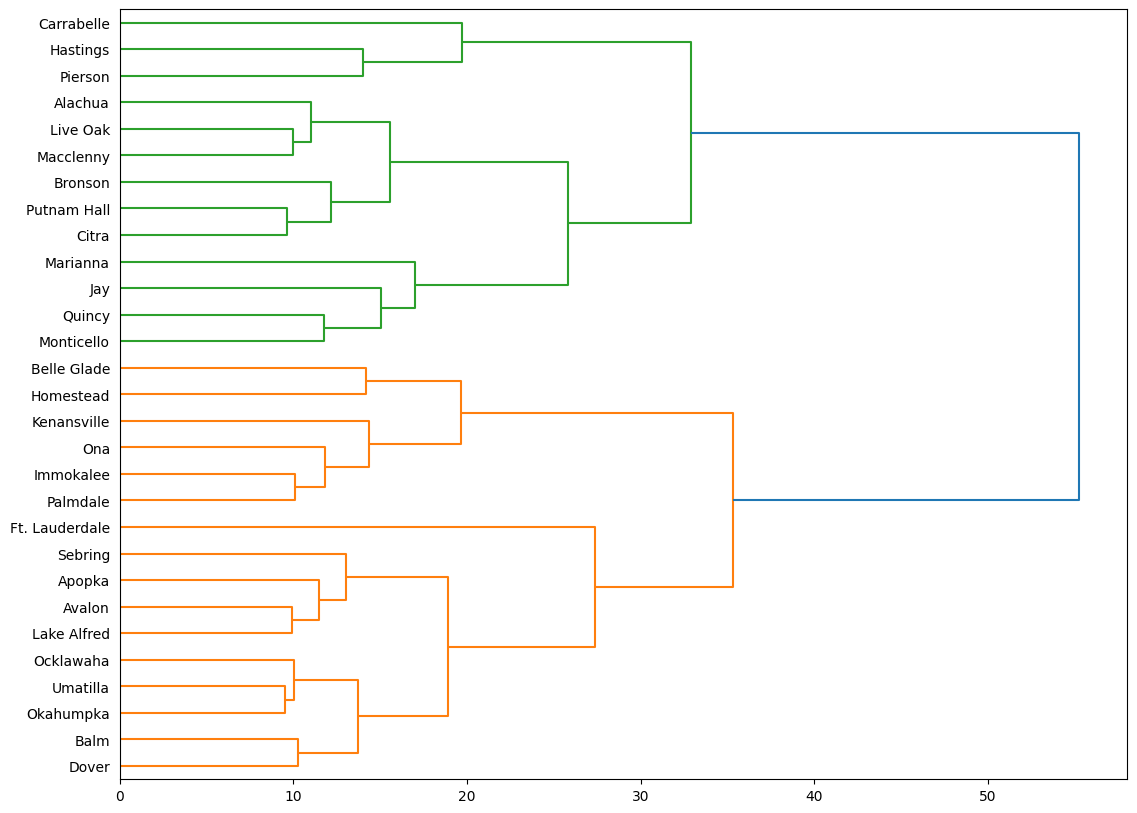

In [30]:
n_clusters=6
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

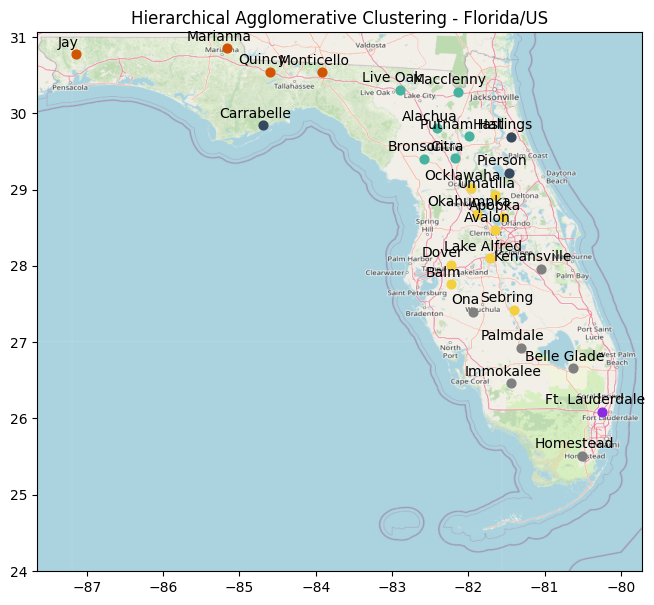

In [31]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std, "Hierarchical Agglomerative Clustering - Florida/US")

In [32]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.539148202249284
RMSE for station 1: 0.3624328407062014
RMSE for station 2: 0.34633470576505465
RMSE for Cluster 1: 0.41597191624018004
Cluster 2
RMSE for station 0: 0.3337553275223485
RMSE for station 1: 0.35786984921050513
RMSE for station 2: 0.30300171805901216
RMSE for station 3: 0.26843300897894784
RMSE for station 4: 0.28557619179009786
RMSE for station 5: 0.2832547845357559
RMSE for Cluster 2: 0.30531514668277787
Cluster 3
RMSE for station 0: 0.4646491171527515
RMSE for station 1: 0.33034505293206684
RMSE for station 2: 0.2568516199155326
RMSE for station 3: 0.33850229689891403
RMSE for Cluster 3: 0.34758702172481626
Cluster 4
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 4: 0.4032913329391137
Cluster 5
RMSE for station 0: 0.3095534914798923
RMS

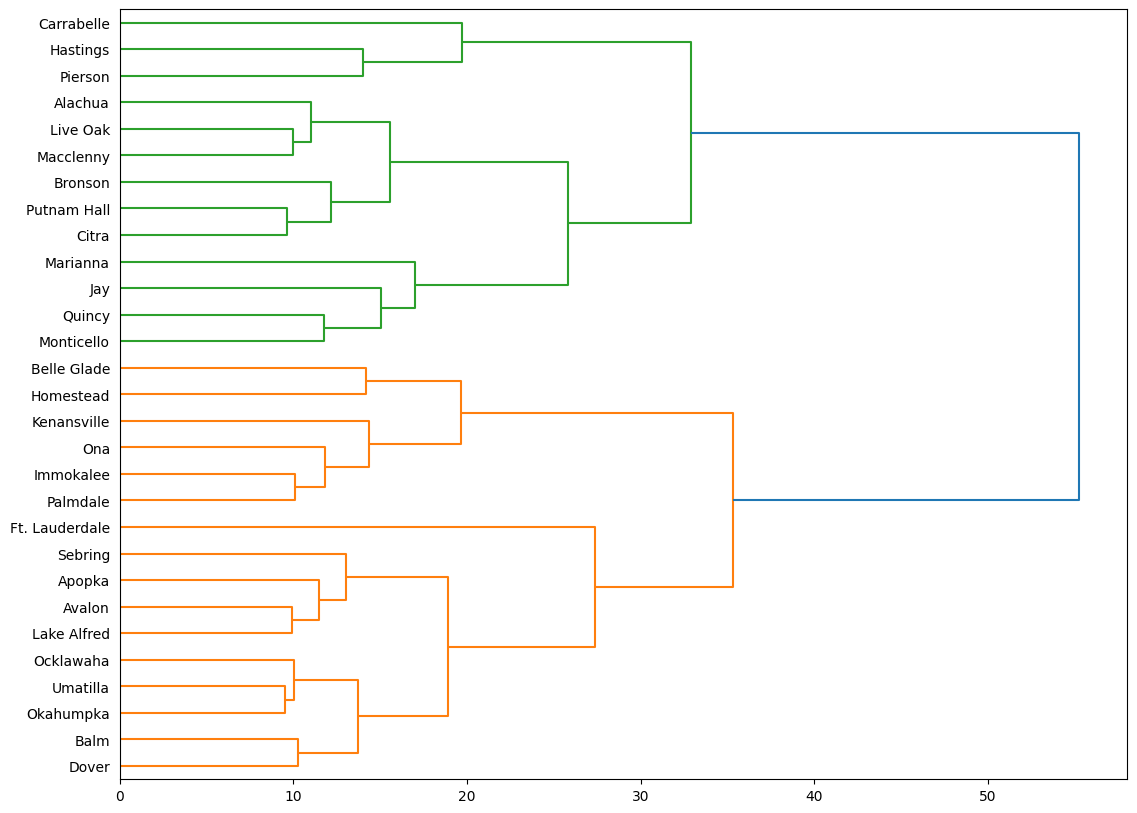

In [25]:
n_clusters=7
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)

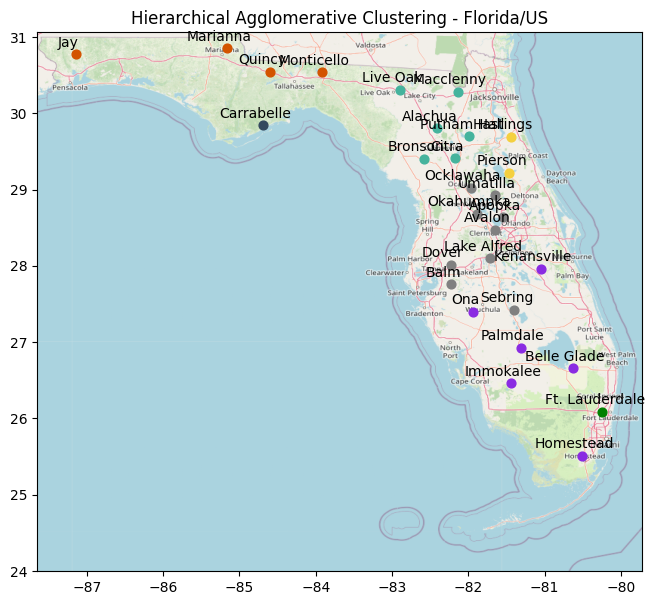

In [26]:
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std, "Hierarchical Agglomerative Clustering - Florida/US")

In [27]:
# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

Cluster 1
RMSE for station 0: 0.3691274497761077
RMSE for station 1: 0.3519141494870151
RMSE for Cluster 1: 0.36052079963156136
Cluster 2
RMSE for Cluster 2: 0.0
Cluster 3
RMSE for station 0: 0.3337553275223485
RMSE for station 1: 0.35786984921050513
RMSE for station 2: 0.30300171805901216
RMSE for station 3: 0.26843300897894784
RMSE for station 4: 0.28557619179009786
RMSE for station 5: 0.2832547845357559
RMSE for Cluster 3: 0.30531514668277787
Cluster 4
RMSE for station 0: 0.4646491171527515
RMSE for station 1: 0.33034505293206684
RMSE for station 2: 0.2568516199155326
RMSE for station 3: 0.33850229689891403
RMSE for Cluster 4: 0.34758702172481626
Cluster 5
RMSE for station 0: 0.44828547937779206
RMSE for station 1: 0.39944542097977115
RMSE for station 2: 0.3959944458884616
RMSE for station 3: 0.4657116508154838
RMSE for station 4: 0.3912361532745505
RMSE for station 5: 0.3190748472986228
RMSE for Cluster 5: 0.4032913329391137
Cluster 6
RMSE for station 0: 0.3095534914798923
RMSE for